In [155]:
import numpy as np
import pandas as pd
import os
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'penalty_3.09_window_40_5hours.txt'
path = os.path.join(os.getcwd(),'results/theta_rej_rate' ,FILE_NAME)
with open(path, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej.sort_values(by='Theta', inplace=True)
theta_rej

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ricardo/Desktop/Ricardo_Simulator/Artemis_version/Simulator/results/theta_rej_rate/theta_0.0_0.0_penalty_3.09_window_120_2hours.txt'

In [127]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean().head(11)
mean_rejection_rates.max()

0.3423734590694768

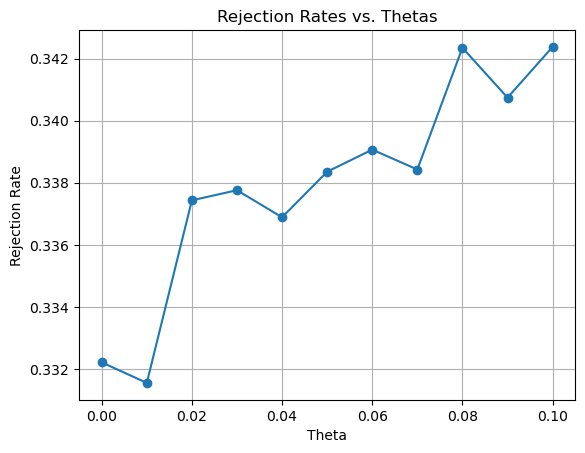

In [128]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()

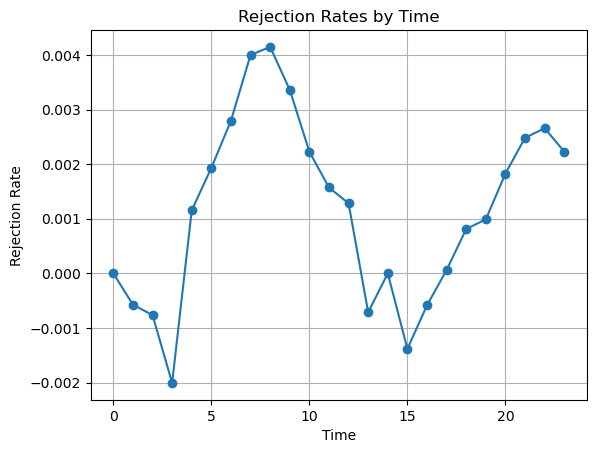

In [172]:
import ast
import matplotlib.dates as mdates
from datetime import datetime, timedelta

FILE_NAME_BASE = f"theta_0.0_0.0_penalty_3.09_window_120_2hours.txt"
FILE_NAME_TEST = f"theta_0.0_0.1_penalty_3.09_window_120_2hours.txt"

base_path = os.path.join(os.getcwd(),'results/rej_rate_accumulated' ,FILE_NAME_BASE)
test_path = os.path.join(os.getcwd(),'results/rej_rate_accumulated' ,FILE_NAME_TEST)
with open(base_path , 'r') as result:
    base_list = result.read()

with open(test_path , 'r') as result:
    test_list = result.read()

# rej_list = rej_list.split('\n')[0]
# Convert the string representation of the list to an actual list of floats
base_list = ast.literal_eval(base_list)
test_list = ast.literal_eval(test_list)

diff_list = np.array(base_list) - np.array(test_list)
# Plot the data
plt.plot(diff_list, marker='o')
plt.xlabel('Time')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates by Time')
plt.grid(True)

plt.show()

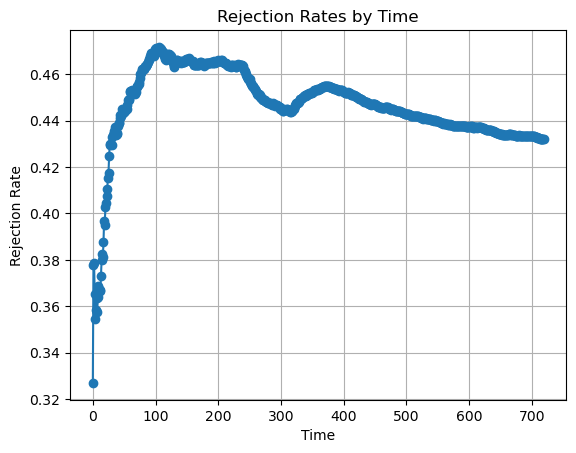

In [302]:
import ast
import matplotlib.dates as mdates
from datetime import datetime, timedelta

FILE_NAME_BASE = f"detailed_theta_0.0_0.0_penalty_0.9_window_40_3hours.txt"
FILE_NAME_TEST = f"detailed_theta_0.0_10.0_penalty_0.9_window_40_3hours.txt"

base_path = os.path.join(os.getcwd(),'results/toggle_theta' ,FILE_NAME_BASE)
test_path = os.path.join(os.getcwd(),'results/toggle_theta' ,FILE_NAME_TEST)
with open(base_path , 'r') as result:
    base_list = result.read()

with open(test_path , 'r') as result:
    test_list = result.read()

# rej_list = rej_list.split('\n')[0]
# Convert the string representation of the list to an actual list of floats
base_list = ast.literal_eval(base_list)
test_list = ast.literal_eval(test_list)

diff_list = np.array(base_list) - np.array(test_list)
# Plot the data
plt.plot(test_list, marker='o')
plt.xlabel('Time')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates by Time')
plt.grid(True)

plt.show()